<center><h1>Introduction to image processing - Radiometry</h1></center>

## Introduction

For the following exercices, you need Python 3 with some basic librairies (see below).
All images necessary for the session are available [here](https://github.com/judelo/notebooks/tree/master/im). 

If you use your own Python 3 install, you should download the images, put them in a convenient directory and update the path in the next cell.

For some parts of the session (cells with commands written as `todo_something`...), you are supposed to code by yourself.   

In [4]:
path = '../im/'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following line will be used to import the solutions of the practical session. Do not use it for the moment.

In [6]:
from TP_radiometrie import *

## Load and display a color image 

A color image is made of three channels : red, green and blue. A color image in $\mathbb{R}^{N\times M}$ is stored as a $N\times M\times 3$ matrix.


<span style="color:red">
    
**Be careful with the functions `plt.imread()` and `plt.imshow()` of `matplotlib`.** 
- `plt.imread()` reads png images as numpy arrays of floating points between 0 and 1, but it reads jpg or bmp images as numpy arrays of 8 bit integers. 

- **In this practical session, we assume floating point images between 0 and 1, so if you use jpg or bmp images, you should normalize them to $[0,1]$.** 

- If 'im' is an image encoded as a double numpy array, `plt.imshow(im)` will display all values above 1 in white and all values below 0 in black. If the image 'im' is encoded on 8 bits though, `plt.imshow(im)` will display 0 in black and 255 in white.</span>


In [7]:
imrgb =plt.imread(path+"parrot.png")

Display the image size.

In [8]:
[nrow,ncol,nch]=imrgb.shape
print(nrow,ncol,nch)

495 495 3


You can use `plt.imshow()` to display the 3D numpy array `imrgb` as an image. 

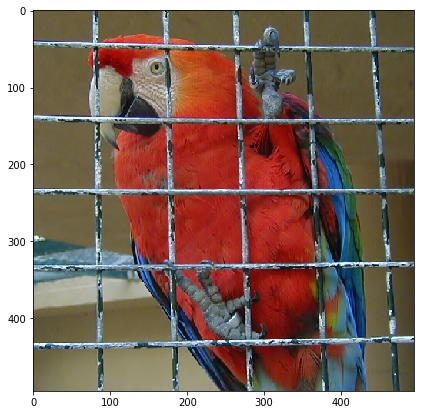

In [9]:
plt.figure(figsize=(7, 7))
plt.imshow(imrgb)

It might be useful to convert the color image to gray level. This can be done by averaging the three channels, or by computing another well chosen linear combination of the coordinates R, G and B. 

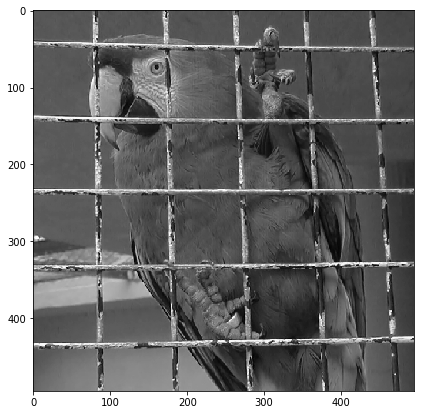

In [11]:
imgray = np.sum(imrgb,2)/3
plt.figure(figsize=(7, 7))
plt.imshow(imgray,cmap='gray')

## Histograms and contrast enhancement

### Computing histograms

In the following, we compute and display the gray level histogram and the cumulative histogram of an image. 
 
The cumulative histogram of a discrete image $u$ is an increasing function defined on $\mathbb{R}$ by
$$H_u(\lambda)=\frac{1}{|\Omega|}\#{\{\textbf{x};\;u(\textbf{x})\leq \lambda\}}.$$
The histogram of $u$ is the derivative of $H_u$ in the sense of distributions.


1. We compute the histogram of the image `imrgb`

In [12]:
imhisto, bins = np.histogram(imgray, range=(0,1), bins = 256)
imhisto      = imhisto/np.sum(imhisto)

2. We now compute the corresponding cumulative histogram thanks to the function `np.cumsum()`which cumulates the values of a vector from left to right.

In [12]:
imhistocum = np.cumsum(imhisto) 

3. We display the image, histogram and cumulative histogram

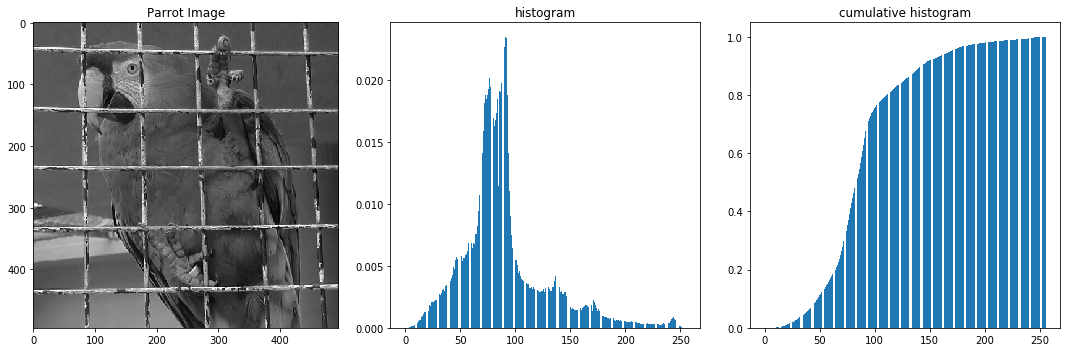

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].imshow(imgray,cmap='gray')
axes[0].set_title('Parrot Image')
axes[1].bar(np.arange(0,256),imhisto)
axes[1].set_title('histogram')
axes[2].bar(np.arange(0,256),imhistocum)
axes[2].set_title('cumulative histogram')
fig.tight_layout()

### Histogram equalization 

If $u$ is a discrete image and $h_u$  its gray level distribution, histogram equalization consists in
applying a contrast change $g$ (increasing function) to $u$ such that $h_{g(u)}$ is as close as possible to a constant distribution. We can compute directly $$H_u(u)*255.$$

To this aim, we can apply directly the vector `imhistocum` (which can be seen as a function from $\{0,\dots,255\}$ into $[0,1]$) to the numpy array `imgray`. Since `imgray` has values between $0$ and $1$, it is necessary to multiply it by $255$ and cast it as a 8-bit array. 

In [14]:
imeq = imhistocum[np.uint8(imgray*255)]

We can now display the resulting equalized image.

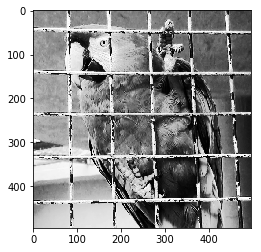

In [15]:
plt.imshow(imeq,cmap = 'gray')
plt.show()

**Now, apply the previous histogram equalization to the two images `parrot_bright` and `parrot_dark`, plot the corresponding histograms and cumulative histograms. Comment the results and explain the observed differences.** 

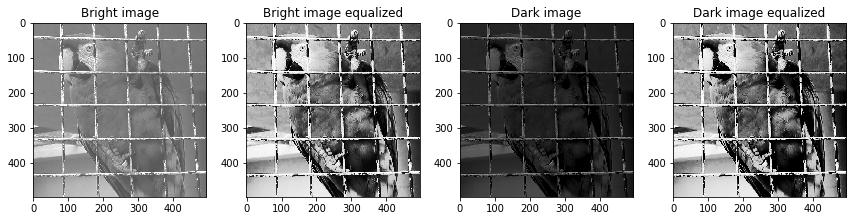

In [2]:
imrgb1 = plt.imread(path+'parrot_bright.png')
imrgb2 = plt.imread(path+'parrot_dark.png')
todo_equalization(imrgb1,imrgb2)

### Histogram specification

If $u$ is a discrete image and $h_u$  its gray level distribution, histogram specification consists in  applying a contrast change $g$ (an increasing function) to $u$ such that $h_{g(u)}$ is as close as possible to a target discrete   probability distribution $h_t$. Specification is particularly useful to compare two images of the same scene (in this case the target distribution is the histogram of the second image $v$). 

We start by reading our two images $u$ and $v$.

In [13]:
buenos1=np.double(plt.imread(path+'buenosaires3.png'))
buenos2=np.double(plt.imread(path+'buenosaires4.png'))
u = buenos1[:,:,0]
v = buenos2[:,:,1]
[nrowu,ncolu]=u.shape
[nrowv,ncolv]=v.shape

1. Now, histogram specification between two grey level images $u$ and $v$ can be computed easily by sorting the pixels of both images and by replacing each gray level in $u$ by the gray level of similar rank in $v$.

In [14]:
u_sort,index_u=np.sort(u,axis=None),np.argsort(u,axis=None)
[v_sort,index_v]=np.sort(v,axis=None),np.argsort(v,axis=None)
uspecifv= np.zeros(nrowu*ncolu)
uspecifv[index_u] = v_sort
uspecifv = uspecifv.reshape(nrowu,ncolu)

We can now display the result.

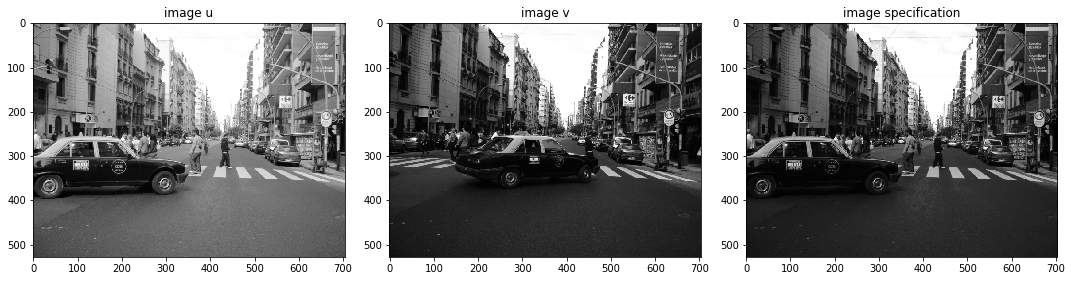

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].set_title('image u')
axes[0].imshow(u,'gray')
axes[1].set_title('image v')
axes[1].imshow(v,'gray')
axes[2].set_title('image specification')
axes[2].imshow(uspecifv,'gray')
fig.tight_layout()
plt.show()

**2. Try to translate the grey levels of $u$ such that it has the same mean grey level than $v$ and display the result. Is it similar to the specification of $u$ on $v$ ?** 

**3. Same question by applying an affine transform to $u$ so that its mean and variance match the ones of $v$.** 


### Midway histogram 

The Midway histogram between two histograms $h_u$ et $h_v$ is defined from it cumulative function  $H_{midway}$ :
$$H_{midway}=\left( \frac{H_u^{-1}+H_v^{-1}}{2}\right)^{-1}.$$
The goal is to modify the contrast of both images $u$ and $v$ in order to give them the same intermediary grey level distribution.

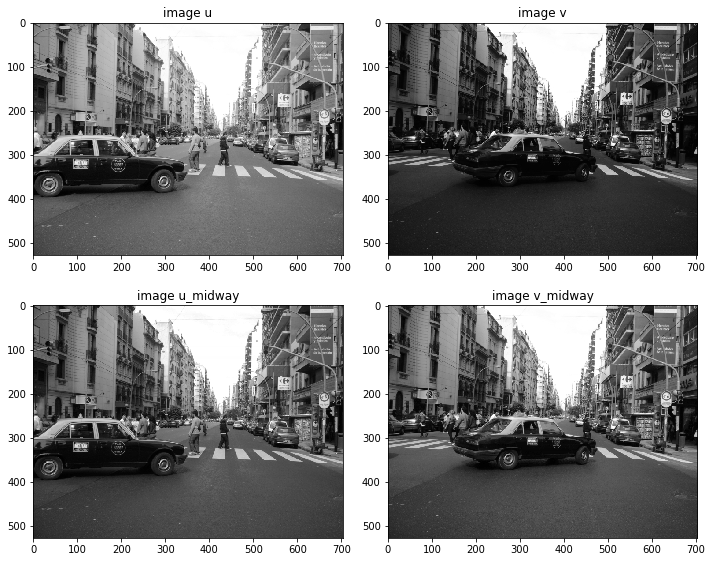

In [13]:
u_midway=np.zeros(len(index_u))
v_midway=np.zeros(len(index_v))

u_midway[index_u] = (u_sort + v_sort)/2
v_midway[index_v] = (u_sort + v_sort)/2
u_midway = u_midway.reshape(nrowu,ncolu)
v_midway = v_midway.reshape(nrowv,ncolv)


#Display the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0,0].set_title('image u')
axes[0,0].imshow(u,'gray')
axes[0,1].set_title('image v')
axes[0,1].imshow(v,'gray')
axes[1,0].set_title('image u_midway')
axes[1,0].imshow(u_midway,'gray')
axes[1,1].set_title('image v_midway')
axes[1,1].imshow(v_midway,'gray')
fig.tight_layout()
plt.show()

### Simple transformations

 In this exercice, you are asked to perform simple transformations on an image and find out what happens on the corresponding histogram : thresholding, affine transformation, gamma correction. 

### Effect of Noise on histograms
 
In the following, we want to create different noisy versions of an image $u$ and observe how the histogram $h_u$ is transformed.

**Gaussian noise** 

1. Write a function adding a gaussian noise $b$ to the image $u$. An image of gaussian noise of mean $0$ and of standard deviation $\sigma$ is obtained with the command 

        sigma*np.random.randn(nrow,ncol) 

2. Display the noisy image and its histogram for different values of $\sigma$. 
3. What do you observe ? What is the relation between the histogram of $u$ and the one of $u+b$ ? 

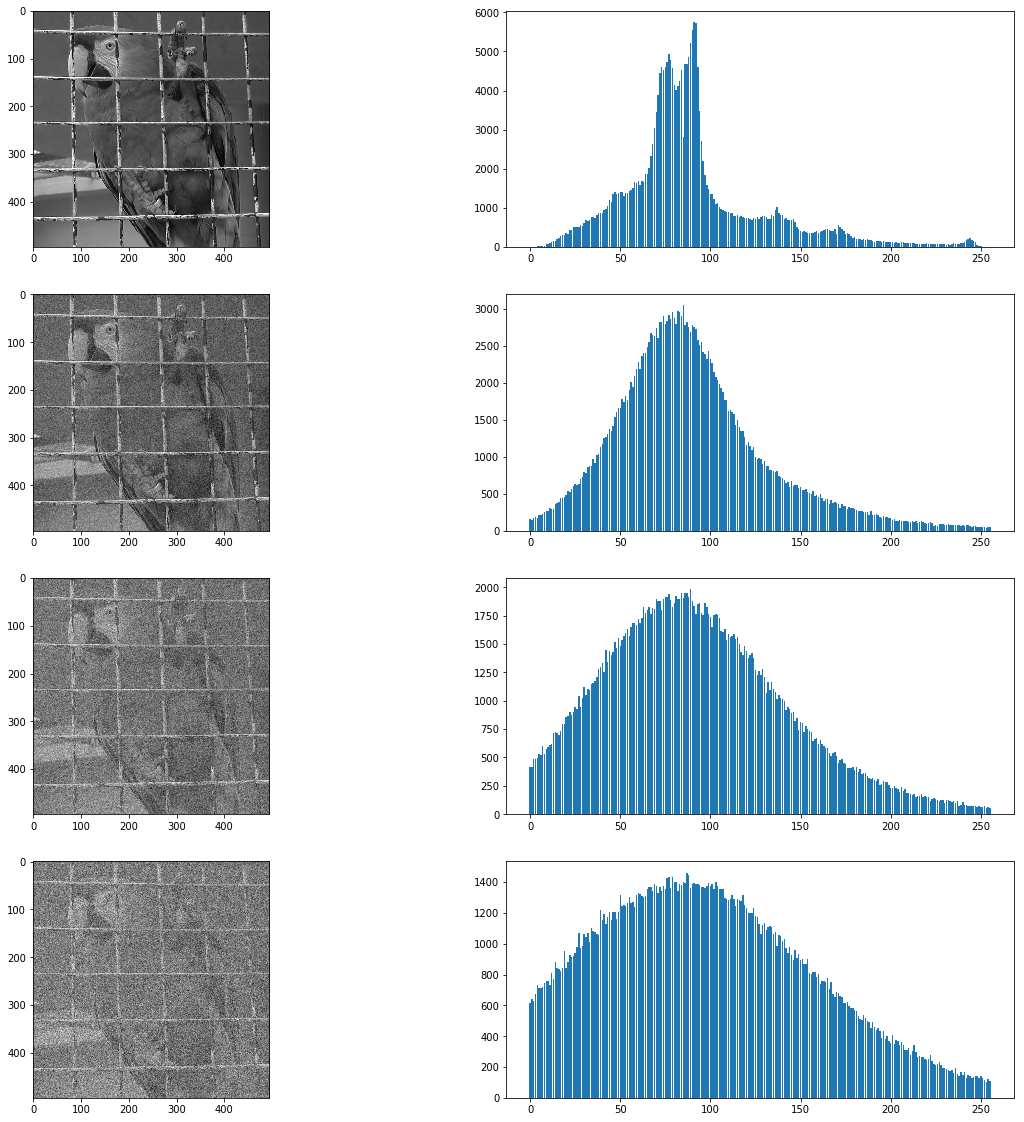

In [16]:
imgray = np.mean(plt.imread(path+'parrot.png'),2)
todo_noise_histograms(imgray)

**Uniform noise** Same questions with $b$ a uniform additive noise.

**Impulse noise** Let us recall that impulse noise destroy randomly a proportion $p$ of the pixels in $u$ and replace their values by uniform random values between $0$ and $255$. Mathematically, this can be modeled as $u_b= (1-X)u+XY$, where $X$ follows a Bernouilli law of parameter $p$ and $Y$ follows a uniform law on $\{0,\dots 255\}$. 
     
1. Write a function adding impulse noise of parameter p to an image u.
/Hint/ : you can start by using the function ~rand~ to create a table `tab` of random numbers following the uniform law on $[0,1[$ 
               
               tab = np.random.rand(u.shape[0],u.shape[1])
           
and then replace randomly $p\%$ of the pixels of $u$ by a random grey level

               ub = 255*np.random.rand(u.shape[0],u.shape[1])*(tab<p/100)+(tab>=p/100)*u;
               
2. Display the noisy image and its histogram for different values of p. What is the relation between the histogram of u and the one of u_b ?

## Image Quantization

### Quantization 

Image quantization consists in reducing the set of grey levels $Y = \{ y_0,\dots y_{n-1} \}$ or colors of an image $u$ into a smaller set of quantized values $\{q_0,\dots q_{p-1}\}$ ($p < n$). This operation is useful for displaying an image $u$ on a screen that supports a smaller number of colors (this is needed with a standard screen if $u$ is coded on more than 8 bits by channel).

A quantization operator $Q$ is defined by the values $(q_i)_{i=0, \dots p-1}$ and  $(t_j)_{j=0,\dots p}$ such that
$$ t_0 \leq q_0 \leq t_1 \leq q_1 \leq \dots q_{p-1} \leq t_p,\text{ and } Q(\lambda)=q_i \text{ if } t_i \leq \lambda < t_{i+1}.$$

 
*Uniform Quantization*
Uniform quantization consists in dividing the set $Y$ in $p$ regular intervals. 

- Use uniform quantization on a gray level image (try different numbers $K$ of grey levels) and display the result. For which value of $K$ do you start to see a difference with the original image ? 


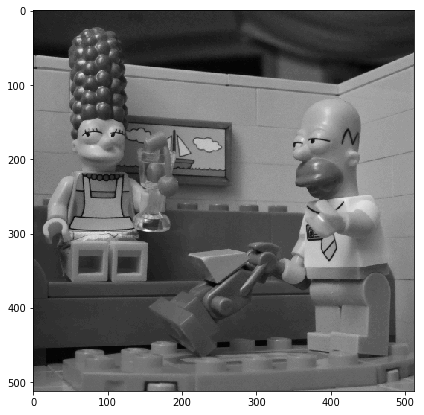

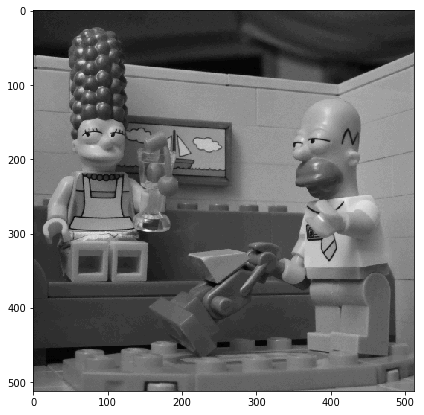

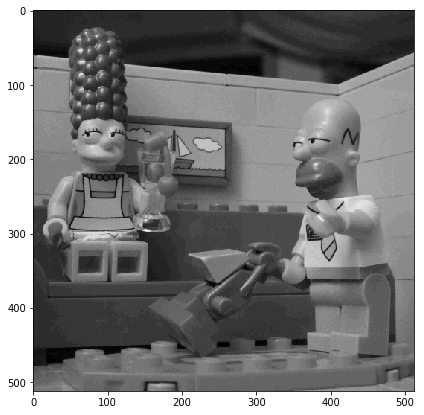

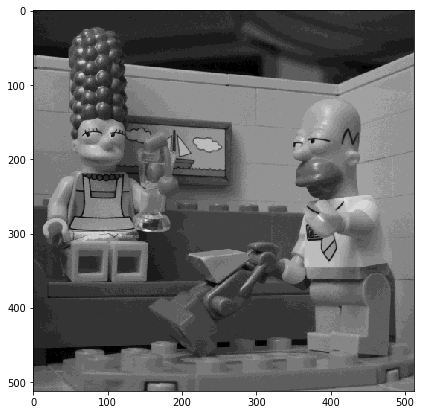

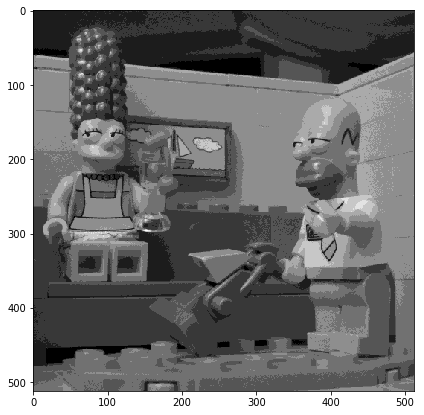

In [7]:
u = np.mean(plt.imread(path+'simpson512.png'),2)

for K in range(50,1,-10):
    uquantif = (np.floor(u*(K-1)+0.5))/K# quantization on K=10 grey levels
    plt.figure(figsize=(7, 7))
    plt.imshow(uquantif,'gray')
    plt.show()

*Histogram-based Quantization*
This consists in choosing $t_i=\min \{\lambda; H_u(\lambda) \geq \frac{i}{p} \}$, and the $q_i$ are defined as the barycenters of the intervals $[t_i,t_{i+1}].$

1. Show that this boils down to an histogram equalization followed by a uniform quantization
2. Apply this quantization on a gray level image and display the result. Same question on the limit value $K$ for which we perceive a difference with the original image.


*Lloyd-Max quantization* 
This quantization consists in minimizing the least square error
$$LSE((q_i)_{i=1\dots p-1},(t_i)_{i=1\dots p})= \sum_{i=0}^{p-1} \int_{t_i}^{t_{i+1}} h(\lambda) (\lambda -q_i)^2.$$
It is equivalent to the algorithm `Kmeans` in one dimension.
      1) Write the optimality conditions that should be satisfied by the solution $\{(\widehat{q_i}),(\widehat{t_i})\}$.
      2) Write a function which minimizes the least square error by alternatively minimizing in $(q_i)_{i=0, \dots p-1}$ and  $(t_j)_{j=0,\dots p}$. 
      3) Apply this quantization on the previous gray level image for different values of $K$ and display the result. Comment.



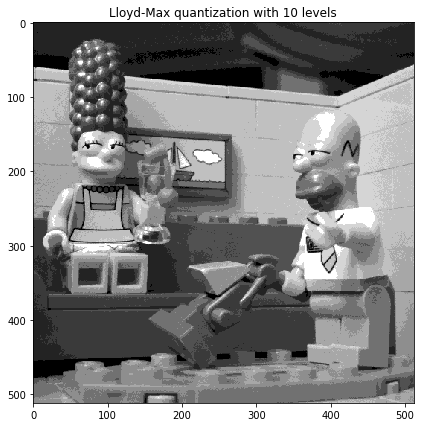

In [17]:
imgray  = np.mean(plt.imread(path+'simpson512.png'),2)

todo_lloyd_max(imgray)

### Dithering

Dithering consists in adding intentionnally noise to an image before quantization. For instance, it can be used to convert a grey level image to black and white in such a way that the density of white dots in the new image is an increasing function of the grey level in the original image. This is particularly useful for impression or displaying.

Let us explain how dithering works in the case of 2 grey levels (binarization). All grey levels smaller than a value $\lambda$ are replaced by $0$ and those greater than $\lambda$ are replaced by $255$. If we add a i.i.d. noise $B$ of density $p_B$ to $u$ before the binarization, then at the pixel $x$ we get
$$P[u(x) + B(x) > \lambda]  = P[B(x) > \lambda - u(x) ] =   \int_{\lambda - u(x)}^{+\infty} p_B(s)ds,$$
which is an increasing function of the value $u(x)$. The probability that $x$ turns white in the dithered image is thus an increasing function of its original grey level. 

**Perform dithering in order to quantize a gray level image on 10 levels (you can add a small Gaussian noise of std 5/255 for instance). Compare the result with the previous quantizations without dithering.** 

**Try with different levels of noise.**


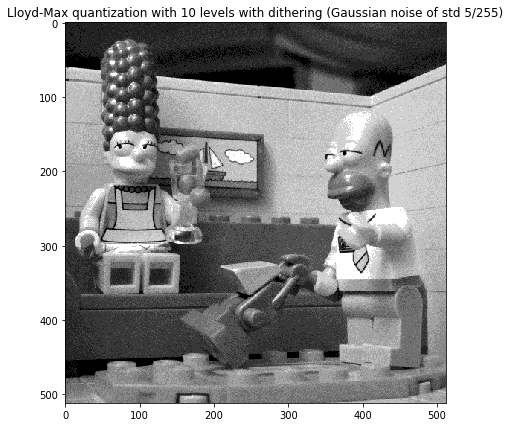

In [18]:
imgray  = np.mean(plt.imread(path+'simpson512.png'),2)

todo_dithering(imgray)